In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [4]:
path = "Z:\\Sasindu\\Data set\\Titanic\\Titanic-Dataset.csv"
data = pd.read_csv(path)
df = pd.DataFrame(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing Value

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Check for Duplicates

In [8]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


## Distributhion Plots

### Histogram and Boxplot for Numerical Data

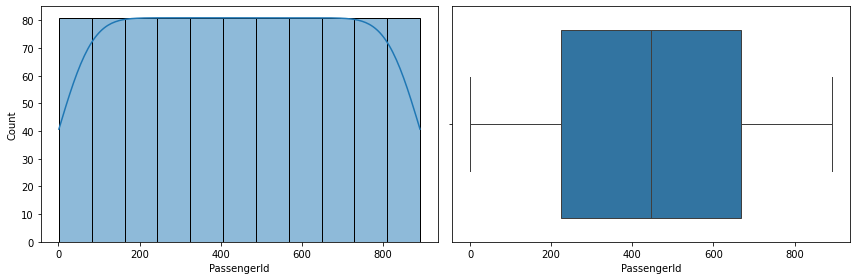

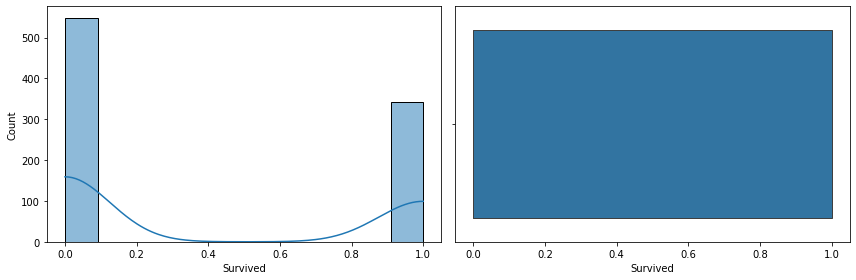

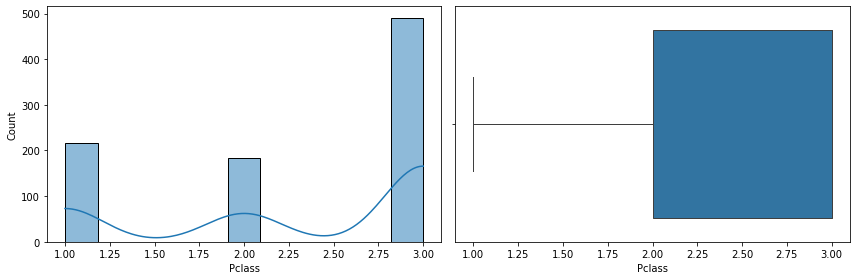

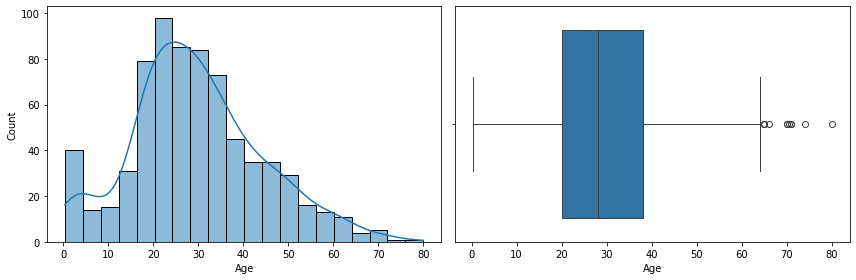

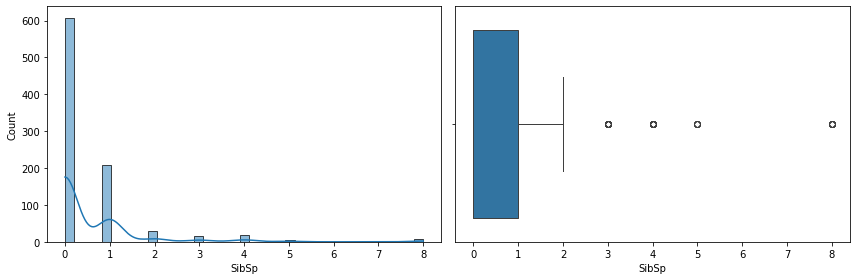

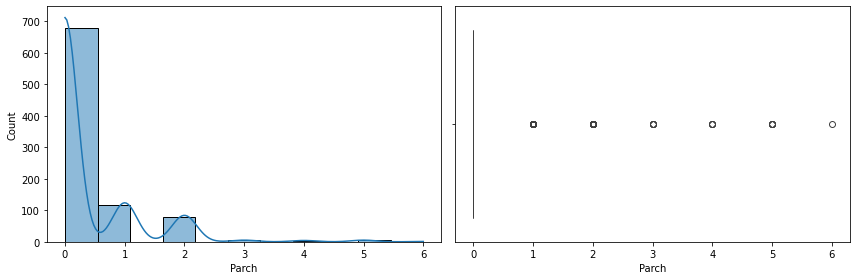

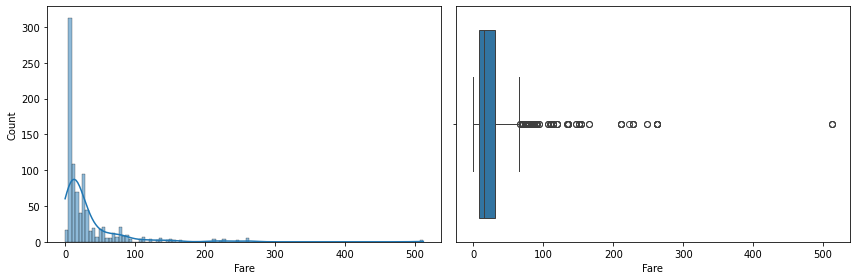

In [9]:
numeric_vals = df.select_dtypes(include='number').columns

for col in numeric_vals:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.tight_layout()
    plt.show()

### Count Plots for Categorical Data

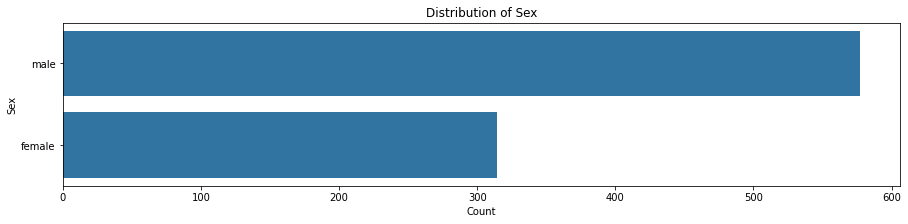

In [19]:
plt.figure(figsize=(15,3))
sns.countplot(y = 'Sex', data = df, order = df['Sex'].value_counts().index)
plt.title(f'Distribution of Sex')
plt.xlabel('Count')
plt.ylabel('Sex')
plt.show()

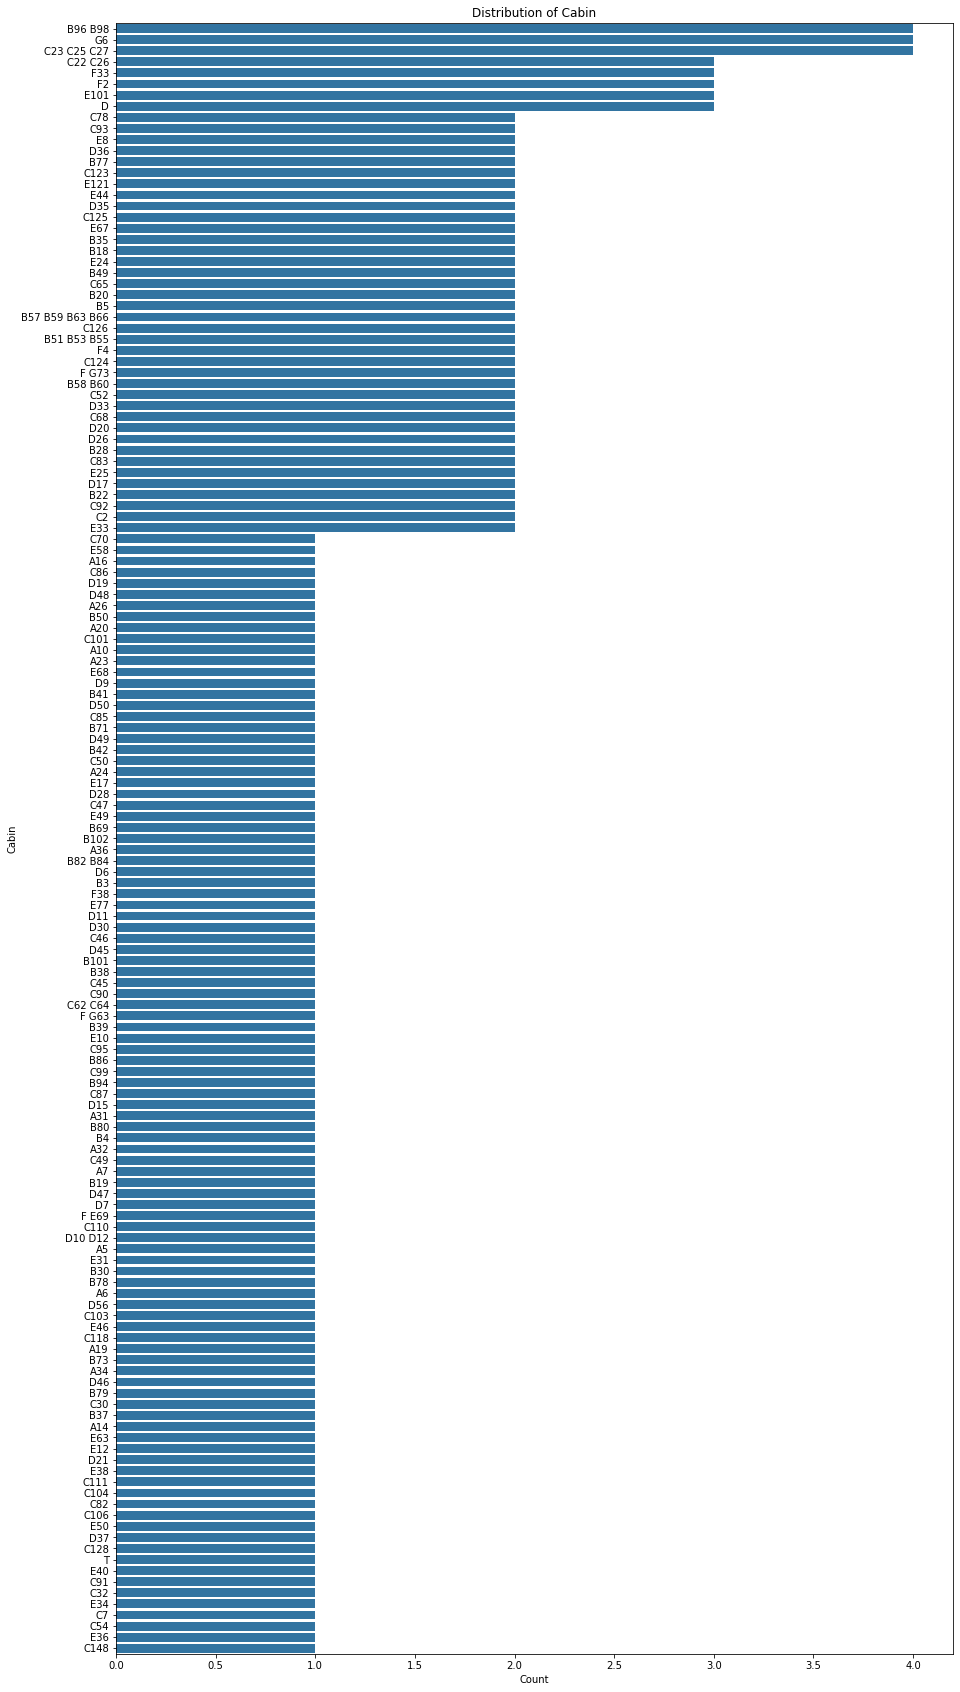

In [21]:
plt.figure(figsize=(15,30))
sns.countplot(y = 'Cabin', data = df, order = df['Cabin'].value_counts().index)
plt.title(f'Distribution of Cabin')
plt.xlabel('Count')
plt.ylabel('Cabin')
plt.show()

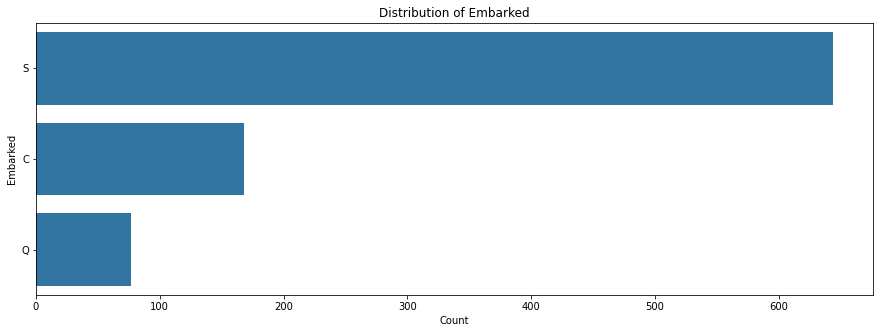

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(y = 'Embarked', data = df, order = df['Embarked'].value_counts().index)
plt.title(f'Distribution of Embarked')
plt.xlabel('Count')
plt.ylabel('Embarked')
plt.show()

## Handling Missing Values

### Fill Missing Values

#### The Age column filled with median because of having skewed distribution.

In [24]:
df['Age'] = df['Age'].fillna(df['Age'].median())

#### The Embarked column filled with mode accoring to filling categorical missing values. 

In [32]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])

#### The cabin column has 687 missing values it is more than 75% from the whole observations. So that I ceated new category as Unknown and assigned them in to it.

In [26]:
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [33]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64